# Bike Sharing Service Case Study
## Converting Casual Members To Annual Members

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


# check monthly trend
# check starting and ending station comparisons
# check duration
# check ride type


In [2]:
pwd = os.getcwd()
fp2205 = pwd + "/202205-divvy-tripdata.csv"
fp2206 = pwd + "/202206-divvy-tripdata.csv"
fp2207 = pwd + "/202207-divvy-tripdata.csv"
fp2208 = pwd + "/202208-divvy-tripdata.csv"
fp2209 = pwd + "/202209-divvy-publictripdata.csv"
fp2210 = pwd + "/202210-divvy-tripdata.csv"
fp2211 = pwd + "/202211-divvy-tripdata.csv"
fp2212 = pwd +  "/202212-divvy-tripdata.csv"
fp2301 = pwd +  "/202301-divvy-tripdata.csv"
fp2302 = pwd +  "/202302-divvy-tripdata.csv"
fp2303 = pwd +  "/202303-divvy-tripdata.csv"
fp2304 = pwd + "/202304-divvy-tripdata.csv"
fp2305 = pwd +  "/202305-divvy-tripdata.csv"



In [3]:
may22 = pd.read_csv(fp2205)
jun22 = pd.read_csv(fp2206)
jul22 = pd.read_csv(fp2207)   
aug22 = pd.read_csv(fp2208)   
sep22 = pd.read_csv(fp2209)
oct22 = pd.read_csv(fp2210)
nov22 = pd.read_csv(fp2211)
dec22 = pd.read_csv(fp2212)
jan23 = pd.read_csv(fp2301)
feb23 = pd.read_csv(fp2302)
mar23 = pd.read_csv(fp2303)
apr23 = pd.read_csv(fp2304)
may23 = pd.read_csv(fp2305)


In [4]:
year_data = pd.concat([may22,jun22,jul22,aug22,sep22,oct22,nov22,dec22,jan23,feb23,mar23,apr23,may23])


In [5]:
year_data = year_data[['ride_id', 'rideable_type', 'started_at', 'ended_at',
                       'start_station_id', 
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual']]
year_data

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,TA1307000117,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,13300,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,TA1305000032,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,TA1305000032,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,TA1305000032,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,KA1504000148,NaN,41.990876,-87.669721,42.000000,-87.660000,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,13216,NaN,41.834734,-87.625798,41.830000,-87.620000,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,13263,NaN,41.884422,-87.619393,41.880000,-87.630000,member
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,1127.0,NaN,41.970000,-87.730000,41.970000,-87.740000,member


In [6]:
year_data['end_station_id'].fillna('N/A',inplace=True)
year_data

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,TA1307000117,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,13300,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,TA1305000032,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,TA1305000032,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,TA1305000032,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,KA1504000148,N/A,41.990876,-87.669721,42.000000,-87.660000,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,13216,N/A,41.834734,-87.625798,41.830000,-87.620000,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,13263,N/A,41.884422,-87.619393,41.880000,-87.630000,member
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,1127.0,N/A,41.970000,-87.730000,41.970000,-87.740000,member


In [7]:
year_data[['started_at', 'ended_at']] = year_data[['started_at', 'ended_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

In [8]:
year_data['duration'] = (year_data['ended_at'] - year_data['started_at']).dt.total_seconds() / 60
year_data

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,TA1307000117,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,13300,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,TA1305000032,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,TA1305000032,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,TA1305000032,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667
...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,KA1504000148,N/A,41.990876,-87.669721,42.000000,-87.660000,member,21.283333
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,13216,N/A,41.834734,-87.625798,41.830000,-87.620000,member,12.816667
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,13263,N/A,41.884422,-87.619393,41.880000,-87.630000,member,5.416667
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,1127.0,N/A,41.970000,-87.730000,41.970000,-87.740000,member,3.866667


In [9]:
year_data['month'] = year_data['started_at'].dt.month
year_data

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,month
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,TA1307000117,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000,5
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,13300,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000,5
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,TA1305000032,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333,5
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,TA1305000032,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000,5
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,TA1305000032,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,KA1504000148,N/A,41.990876,-87.669721,42.000000,-87.660000,member,21.283333,5
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,13216,N/A,41.834734,-87.625798,41.830000,-87.620000,member,12.816667,5
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,13263,N/A,41.884422,-87.619393,41.880000,-87.630000,member,5.416667,5
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,1127.0,N/A,41.970000,-87.730000,41.970000,-87.740000,member,3.866667,5


In [10]:
year_data = year_data[['ride_id',	'rideable_type',		'start_station_id',	'end_station_id',	'start_lat',	'start_lng'	,'end_lat'	,'end_lng'	,'member_casual'	,'duration'	,'month']]
year_data

,ride_id,rideable_type,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,month
0,EC2DE40644C6B0F4,classic_bike,TA1307000117,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000,5
1,1C31AD03897EE385,classic_bike,13300,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000,5
2,1542FBEC830415CF,classic_bike,TA1305000032,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333,5
3,6FF59852924528F8,classic_bike,TA1305000032,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000,5
4,483C52CAAE12E3AC,classic_bike,TA1305000032,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667,5
...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,KA1504000148,N/A,41.990876,-87.669721,42.000000,-87.660000,member,21.283333,5
604823,573025E5EDE10DE1,electric_bike,13216,N/A,41.834734,-87.625798,41.830000,-87.620000,member,12.816667,5
604824,D88D48898C6FB63E,electric_bike,13263,N/A,41.884422,-87.619393,41.880000,-87.630000,member,5.416667,5
604825,4692DCD2F87497F5,electric_bike,1127.0,N/A,41.970000,-87.730000,41.970000,-87.740000,member,3.866667,5


## Duration Difference between Member/Casuals


<Axes: xlabel='member_casual'>

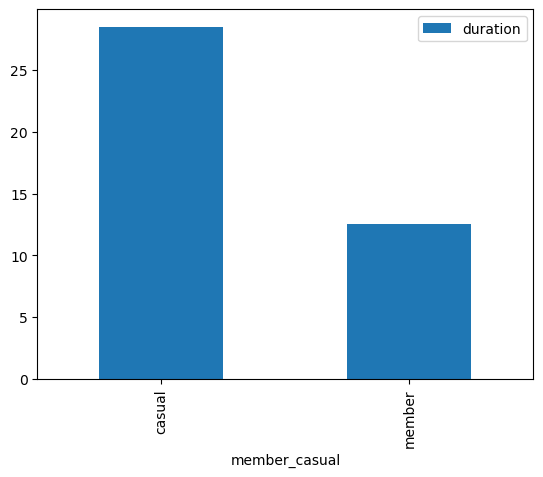

In [11]:
duration_pivot = year_data.groupby('member_casual').aggregate({'duration' : 'mean'})


duration_pivot.plot(kind='bar')

### Compare with total rides and type of rides

<Axes: xlabel='member_casual'>

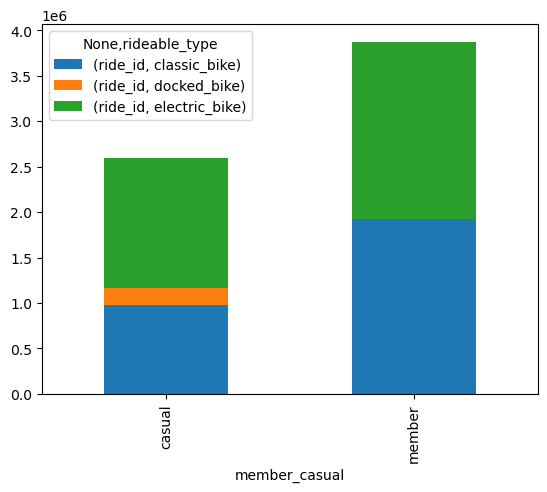

In [12]:
ridetype_pivot = year_data.groupby(['member_casual','rideable_type']).aggregate({'ride_id' : 'count'})
ridetype_pivot.unstack().plot(kind= 'bar', stacked=True)

### Seasonal Patterns in No. Of Rides 

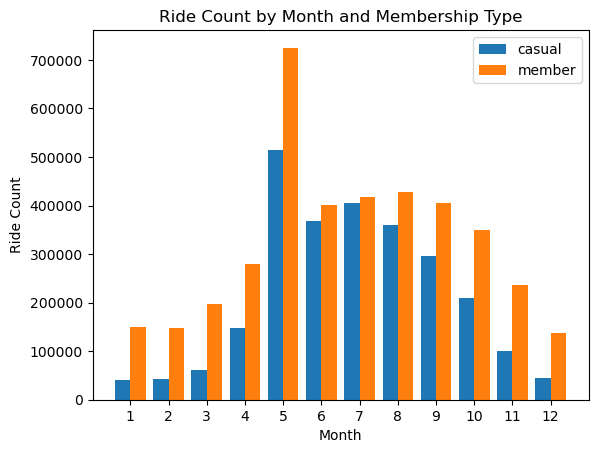

In [13]:

# Assuming your aggregated data is stored in a DataFrame called 'seasonal_pattern'
seasonal_pattern = year_data.groupby(['member_casual','month']).aggregate({'ride_id' : 'count'}).reset_index()

# Get the unique values for month and member_casual
months = seasonal_pattern['month'].unique()
member_types = seasonal_pattern['member_casual'].unique()

# Set the width of the bars
bar_width = 0.4

# Create the figure and axes
fig, ax = plt.subplots()

# Loop through each member type and plot the data
for i, member_type in enumerate(member_types):
    # Get the data for the current member type
    data = seasonal_pattern[seasonal_pattern['member_casual'] == member_type]
    
    # Set the x position of the bars
    x_pos = np.arange(len(months)) + i * bar_width
    
    # Plot the data
    ax.bar(x_pos, data['ride_id'], width=bar_width, label=member_type)

# Set the xticks and labels
ax.set_xticks(np.arange(len(months)) + bar_width / 2)
ax.set_xticklabels(months)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Ride Count')
ax.set_title('Ride Count by Month and Membership Type')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Top 10 Casual and Member Start Stations

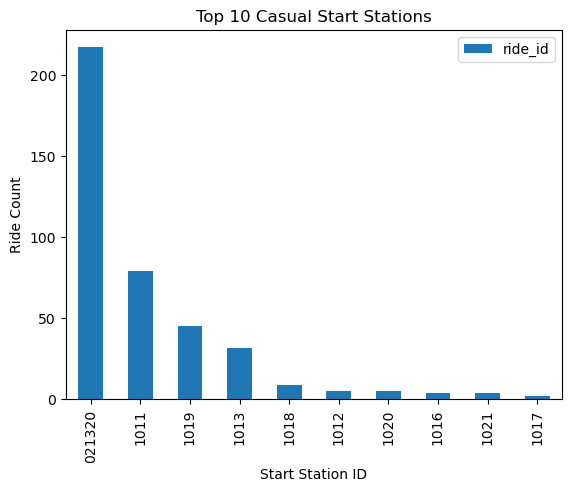

In [14]:
causual_df = year_data[year_data['member_casual'] == 'casual']

top_casual_stations = causual_df.groupby('start_station_id').aggregate({'ride_id' : 'count'}).head(10)
top_casual_stations = top_casual_stations.sort_values(by='ride_id',ascending=False)
top_casual_stations.plot(kind='bar', y='ride_id')

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Ride Count')
plt.title('Top 10 Casual Start Stations')

# Show the plot
plt.show()

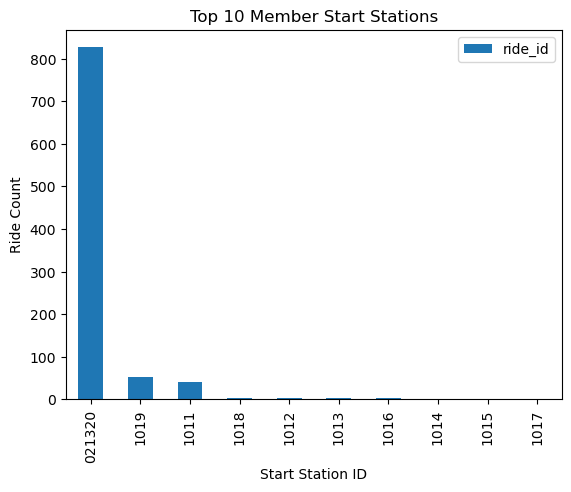

In [15]:
member_df = year_data[year_data['member_casual'] == 'member']

top_member_stations = member_df.groupby('start_station_id').aggregate({'ride_id' : 'count'}).head(10)
top_member_stations = top_member_stations.sort_values(by='ride_id',ascending=False)
top_member_stations.plot(kind='bar', y='ride_id')

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Ride Count')
plt.title('Top 10 Member Start Stations')

# Show the plot
plt.show()

### Top Casual and Member End Stations

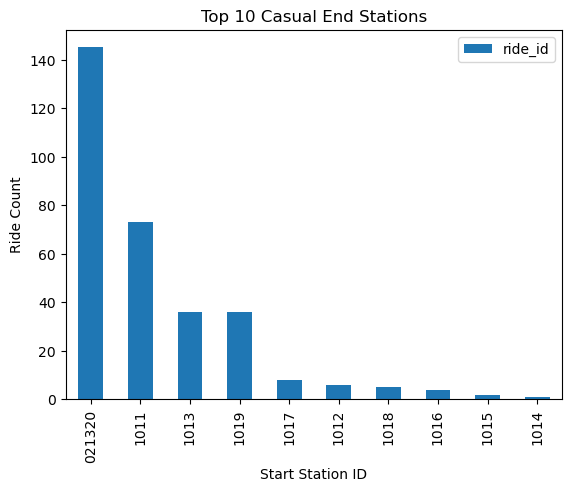

In [20]:
top_casual_end_stations = causual_df.groupby('end_station_id').aggregate({'ride_id' : 'count'}).head(10)
top_casual_end_stations = top_casual_end_stations.sort_values(by='ride_id',ascending=False)
top_casual_end_stations.plot(kind='bar', y='ride_id')

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Ride Count')
plt.title('Top 10 Casual End Stations')

# Show the plot
plt.show()

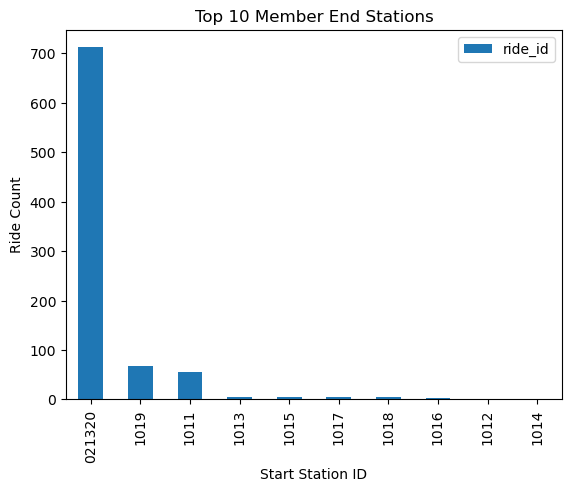

In [21]:
top_member_end_stations = member_df.groupby('end_station_id').aggregate({'ride_id' : 'count'}).head(10)
top_member_end_stations = top_member_end_stations.sort_values(by='ride_id',ascending=False)
top_member_end_stations.plot(kind='bar', y='ride_id')

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Ride Count')
plt.title('Top 10 Member End Stations')

# Show the plot
plt.show()

## Findings
#### 1) Casual Members travel longer but less frequently than Annual Members
#### 2) The diffrence beteen no. of rides between casual and annual members is much closer in May to July.
#### 3) Casual members use much more variety of stations compared to annual members
#### 4) There is no docked bike type available in annual membership

## Top 3 Recommendations
#### 1) Introduce docked bikes in annual membership
#### 2) Give a discount on the monthly fee when a particular journey is above a certain distance threshold.
#### 3) Offer a lower subscription fee in the summer months for new subscribers